**This is a continuation of the One Author Advanced Project, made to help keep things straight**

In [1]:
import pandas as pd
import os
import numpy as np
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import itertools

In [2]:
df = pd.read_csv('E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-1-Data/one_author_advanced_data.csv')

df.head()

,year,paper_text,paper_id,title_len,paper_len,avg_word_len,Oral,Poster,Spotlight,Unknown,is_jordan
0,2001,Minimax Probability Machine\n\nGert R.G. Lanck...,2036,27,17323,4.635348,0,0,0,1,1
1,2003,On the concentration of expectation and\nappro...,2411,81,25777,4.540640,0,0,0,1,1
2,1994,An Alternative Model for Mixtures of\nExperts\...,906,44,17802,4.856669,0,0,0,1,1
3,2011,Divide-and-Conquer Matrix Factorization\nLeste...,4486,39,30128,4.695537,0,0,0,1,1
4,2004,Blind one-microphone speech separation:\nA spe...,2572,68,26817,4.908790,0,0,0,1,1


In [3]:
exclude = ['paper_id', 'is_jordan']
X = df[df.columns.difference(exclude)]

y = df['is_jordan'].values.flatten()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, train_size=0.75, stratify=y)

In [5]:
Tfidf_stop_words = [None, 'english']

In [6]:
C = [1, 0.5, 0.1]

In [7]:
hyperparameters = list(itertools.product(
                        Tfidf_stop_words, C
))

hyperparameters


[(None, 1),
 (None, 0.5),
 (None, 0.1),
 ('english', 1),
 ('english', 0.5),
 ('english', 0.1)]

In [8]:
# Initializing a dictionary with keys corresponding to the hyperparameters I am testing, 
# as well as my results on the train and test sets
LR_dict = {'Tfidf_Stop_Words': [],
            'LogReg_C_value' : [],
            'Train_auc': [],
            'Test_auc': []}

run = 0
for Tfidf_params, C_params in hyperparameters:

    # Counting what iteration I am on
    print(run)
    run += 1

    # Appending the parameters for this run to my dictionary
    LR_dict['Tfidf_Stop_Words'].append(str(Tfidf_params))
    LR_dict['LogReg_C_value'].append(C_params)

    # Initializing the TfidfVectorizer with different stop words, then .fit_transforming it on the train set
    # and .transforming on the test set
    tfidf = TfidfVectorizer(stop_words=Tfidf_params)
    X_train_tfidf = tfidf.fit_transform(X_train.paper_text)
    X_test_tfidf = tfidf.transform(X_test.paper_text)

    # Making a pipeline with the logistic regressor inside, the C hyperparameter is chosen here
    pipe = Pipeline(steps=[
        ('LR', LogisticRegression(class_weight={0:1, 1:99}, C=C_params)),
        
    ])

    # Fitting the pipeline to the train set and predicting on both train and test sets
    pipe.fit(X_train_tfidf, y_train)
    pipe_train_pred = pipe.predict(X_train_tfidf)
    pipe_test_pred = pipe.predict(X_test_tfidf)

    # Finding the roc_auc_score for both
    auc_train = roc_auc_score(y_train, pipe_train_pred)
    auc_test = roc_auc_score(y_test, pipe_test_pred)

    # Appending the scores to the dictionary
    LR_dict['Train_auc'].append(auc_train)
    LR_dict['Test_auc'].append(auc_test)

0
1
2
3
4
5


Using Tfidf inside the loop is time consuming, and using no stop words gives better results across the models, so I will recreate the above code without the TfidfVectorizer in the loop

In [9]:
LR_HPtable = pd.DataFrame.from_dict(LR_dict) 
LR_HPtable

,Tfidf_Stop_Words,LogReg_C_value,Train_auc,Test_auc
0,None,1.0,0.998603,0.572207
1,None,0.5,0.997486,0.596927
2,None,0.1,0.990689,0.667737
3,english,1.0,0.998976,0.572765
4,english,0.5,0.998324,0.597207
5,english,0.1,0.993762,0.619693


In [10]:
stop_words_avg = LR_HPtable.groupby('Tfidf_Stop_Words')['Test_auc'].mean()
stop_words_avg

Tfidf_Stop_Words
None       0.612291
english    0.596555
Name: Test_auc, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, train_size=0.75, stratify=y)

In [12]:
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(X_train.paper_text)
X_test = tfidf.transform(X_test.paper_text)

In [13]:
C = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

In [14]:
samplers = ['None', 'ros', 'rus']

In [15]:
hyperparameters = list(itertools.product(
                        C, samplers
))

hyperparameters

[(1, 'None'),
 (1, 'ros'),
 (1, 'rus'),
 (0.5, 'None'),
 (0.5, 'ros'),
 (0.5, 'rus'),
 (0.1, 'None'),
 (0.1, 'ros'),
 (0.1, 'rus'),
 (0.05, 'None'),
 (0.05, 'ros'),
 (0.05, 'rus'),
 (0.01, 'None'),
 (0.01, 'ros'),
 (0.01, 'rus'),
 (0.005, 'None'),
 (0.005, 'ros'),
 (0.005, 'rus'),
 (0.001, 'None'),
 (0.001, 'ros'),
 (0.001, 'rus')]

In [34]:
# Initializing a dictionary with keys corresponding to the hyperparameters I am testing, 
# as well as my results on the train and test sets
LR_dict = {'LogReg_C_value' : [],
            'Sampler': [],
            'Precision': [],
            'Recall': [],
            'Train_auc': [],
            'Test_auc': []}

run = 0
best_score_precision = 0
best_LR_model_precision = None
best_score_recall = 0
best_LR_model_recall = None
best_score_auc = 0
best_LR_model_auc = None

for C_value, sampler_type in hyperparameters:

    # Counting what iteration I am on
    print(run)
    run += 1
    
    # Appending the parameters for this run to my dictionary
    LR_dict['LogReg_C_value'].append(C_value)
    LR_dict['Sampler'].append(sampler_type)

    # Making pipelines for each sampler type, with the C value used within
    if sampler_type == 'rus':
        pipe = Pipeline(steps=[
            ('rus', RandomUnderSampler(random_state=21)),
            ('LR', LogisticRegression(C=C_value))
            ])

    elif sampler_type == 'ros':
        pipe = Pipeline(steps=[
            ('ros', RandomOverSampler(random_state=21)),
            ('LR', LogisticRegression(C=C_value))
            ])

    else:
        pipe = Pipeline(steps=[
            ('LR', LogisticRegression(class_weight={0:1, 1:99}, C=C_value))
            ])

    # Fitting the pipeline to the train set and predicting on both train and test sets
    pipe.fit(X_train, y_train)
    pipe_train_pred = pipe.predict(X_train)
    pipe_test_pred = pipe.predict(X_test)

    # Finding the roc_auc_score for both, I am including precision as in the past 
    # undersampling has led to awful precision scores
    precision = precision_score(y_test, pipe_test_pred)
    recall = recall_score(y_test, pipe_test_pred)
    auc_train = roc_auc_score(y_train, pipe_train_pred)
    auc_test = roc_auc_score(y_test, pipe_test_pred)

    # Appending the scores to the dictionary
    LR_dict['Precision'].append(precision)
    LR_dict['Recall'].append(recall)
    LR_dict['Train_auc'].append(auc_train)
    LR_dict['Test_auc'].append(auc_test)

    # Saving the best model
    if precision > best_score_precision:
        best_score_precision = precision
        best_LR_model_precision = pipe

    if recall > best_score_recall:
        best_score_recall = recall
        best_LR_model_recall = pipe

    if auc_test > best_score_auc:
        best_score_auc = auc_test
        best_LR_model_auc = pipe

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [43]:
LR_HPtable = pd.DataFrame.from_dict(LR_dict) 
LR_HPtable.sort_values(by='Test_auc', ascending=False, inplace=True)
LR_HPtable

,LogReg_C_value,Sampler,Precision,Recall,Train_auc,Test_auc
12,0.010,None,0.069307,0.70,0.945158,0.797486
15,0.005,None,0.031955,0.85,0.861825,0.781145
2,1.000,rus,0.045902,0.70,0.912011,0.768715
5,0.500,rus,0.045752,0.70,0.911359,0.768436
14,0.010,rus,0.044872,0.70,0.910615,0.766760
17,0.005,rus,0.044872,0.70,0.910615,0.766760
8,0.100,rus,0.044872,0.70,0.910708,0.766760
11,0.050,rus,0.044872,0.70,0.910708,0.766760
16,0.005,ros,0.161765,0.55,0.981471,0.759078
19,0.001,ros,0.144737,0.55,0.970762,0.756844


**WHAT IS THE BEST SCORE TO USE? PRECISION, RECALL, SOMETHING IN THE MIDDLE?**

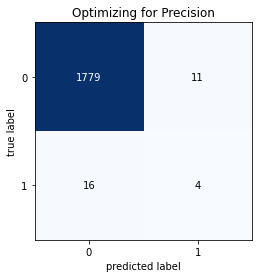

In [39]:
best_LR_model_precision.fit(X_train, y_train)
best_LR_pred = best_LR_model_precision.predict(X_test)
best_LR_cm_test = confusion_matrix(y_test, best_LR_pred)
fig, ax = plot_confusion_matrix(conf_mat=best_LR_cm_test)
plt.title('Optimizing for Precision')
plt.show()

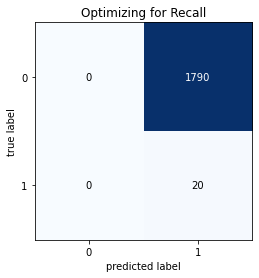

In [40]:
best_LR_model_recall.fit(X_train, y_train)
best_LR_pred = best_LR_model_recall.predict(X_test)
best_LR_cm_test = confusion_matrix(y_test, best_LR_pred)
fig, ax = plot_confusion_matrix(conf_mat=best_LR_cm_test)
plt.title('Optimizing for Recall')
plt.show()

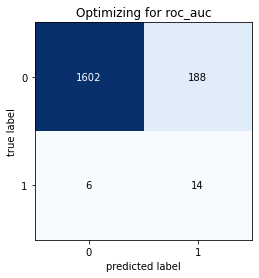

In [41]:
best_LR_model_auc.fit(X_train, y_train)
best_LR_pred = best_LR_model_auc.predict(X_test)
best_LR_cm_test = confusion_matrix(y_test, best_LR_pred)
fig, ax = plot_confusion_matrix(conf_mat=best_LR_cm_test)
plt.title('Optimizing for roc_auc')
plt.show()